                                                                Project "AI Method For Business"

For the course 'AI Method for Business' the students of the master Digital Driven Business have developed different machine learning tools to answer the following research question: 

                                Which (Characteristics of) movies should a cinema screen to maximize ticket sales?                  
                                
The students who participated in this study are: 

* Ward Bleeker          500805826
* Victor Varga          500913660
* Guido Huiskens        500685026
* Melanie Matt          500737939


## I. Import all libraries 

According to Medium (2022), the EDA (Exploratory of Data Analysis) is an essential step. It allows researchers to understand the data and clean it, so it is ready for analysis.

In [297]:
# Import libraries for data manipulation. Adjusted from Dauhmik (n.d.). 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
from scipy.stats import chi2_contingency
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import shapiro
from numpy.random import randn

# Import libraries for data visualization. Adjusted from Medium (2022) 
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

# Import libaries for modelling KNN. Adjusted from Pinosio (2022) 
from sklearn import datasets
from typing import List

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" # The term 'all' is used to make jupyter print all outputs and not only the last one. 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
#from plotnine import * #import fails

#Kmeans library  
import random
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
#pip install yellowbrick 
from yellowbrick.cluster import KElbowVisualizer  # pip install yellowbrick for the Elbow method


### II. EDA: Import Excel file and clean dataset

In [298]:
# Import Excel file Metaclean and show the beginning of the dataset. - Melanie, Viktor, Guido & Ward 
# Read Excel file Sales show the beginning of the dataset. - Melanie, Viktor, Guido & Ward 
df_metaclean = pd.read_csv("C:/Users/Public/AIMethods/metaClean43Brightspace.csv", encoding="ISO-8859-1", delimiter=';')
df_sales = pd.read_csv("C:/Users/Public/AIMethods/sales.csv", encoding="ISO-8859-1", delimiter=';')

In [299]:
# Merge sales data set with metaclean
df_masterfile = df_metaclean.merge(df_sales,
                            on="title",
                            how='left')

df_masterfile['ï»¿url'] = df_masterfile['ï»¿url'].astype('str')
#df_masterfile.dtypes
df_masterfile.drop_duplicates(subset=['ï»¿url'],inplace=True,keep='last')
df_masterfile


,ï»¿url,title,studio,rating,runtime_x,cast,director,genre_x,summary,awards,...,worldwide_box_office,production_budget,Unnamed: 8,opening_weekend,theatre_count,avg run per theatre,runtime_y,keywords,creative_type,url
0,https://www.metacritic.com/movie/!women-art-re...,!Women Art Revolution,Hotwire Productions,| Not Rated,83.0,NaN,Lynn Hershman-Leeson,Documentary,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.metacritic.com/movie/10-cloverfiel...,10 Cloverfield Lane,Paramount Pictures,| PG-13,104.0,"John Gallagher Jr.,John Goodman,Mary Elizabeth...",Dan Trachtenberg,"Action,Sci-Fi,Drama,Mystery,Thriller,Horror","Waking up from a car accident, a young woman (...","#18MostDiscussedMovieof2016 , #1MostSharedMovi...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://www.metacritic.com/movie/10-items-or-less,10 Items or Less,Click Star,| R,82.0,"Jonah Hill,Morgan Freeman,Paz Vega",Brad Silberling,"Drama,Comedy,Romance",While researching a role as a supermarket mana...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://www.metacritic.com/movie/10-years,10 Years,Anchor Bay Entertainment,| R,100.0,"Channing Tatum,Chris Pratt,Jenna Dewan",Jamie Linden,"Drama,Comedy,Romance",NaN,NaN,...,9.876400e+05,NaN,NaN,22707.0,3.0,"2,1",100.0,Ensemble,Contemporary Fiction,https://www.the-numbers.com/movie/10-Years
4,https://www.metacritic.com/movie/100-bloody-acres,100 Bloody Acres,Music Box Films,| Not Rated,91.0,NaN,Cameron Cairnes,"Horror,Comedy",Reg and Lindsay run an organic fertilizer busi...,NaN,...,NaN,NaN,NaN,3419.0,13.0,"1,5",91.0,Accidental Death,Contemporary Fiction,https://www.the-numbers.com/movie/100-Bloody-A...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11990,https://www.metacritic.com/movie/zoolander-2,Zoolander 2,Paramount Pictures,| PG-13,102.0,"Ben Stiller,Kristen Wiig,Owen Wilson,PenÃÂ©lo...",Ben Stiller,Comedy,Derek (Ben Stiller) and Hansel (Owen Wilson) a...,"#87MostDiscussedMovieof2016 , #80MostSharedMov...",...,5.534869e+07,50000000.0,NaN,13841146.0,3394.0,"2,8",102.0,Directing Yourself,Contemporary Fiction,https://www.the-numbers.com/movie/Zoolander-2-...
11992,https://www.metacritic.com/movie/zoom,Zoom,Columbia Pictures,| PG,83.0,"Chevy Chase,Courteney Cox,Tim Allen",Peter Hewitt,"Action,Adventure,Sci-Fi,Family",A former superhero (Allen) is called back into...,NaN,...,1.250619e+07,35000000.0,NaN,4510408.0,2501.0,"2,6",NaN,Independent/Other Comics,Super Hero,https://www.the-numbers.com/movie/Zoom-(2006)
11994,https://www.metacritic.com/movie/zoom-2016,Zoom,Screen Media Films,| Not Rated,96.0,NaN,Pedro Morelli,"Drama,Comedy,Animation",A multi-dimensional interface between a comic ...,NaN,...,1.250619e+07,35000000.0,NaN,4510408.0,2501.0,"2,6",NaN,Independent/Other Comics,Super Hero,https://www.the-numbers.com/movie/Zoom-(2006)
11995,https://www.metacritic.com/movie/zootopia,Zootopia,Walt Disney Studios Motion Pictures,| PG,108.0,NaN,Byron Howard,"Action,Adventure,Comedy,Crime,Animation,Family",NaN,"#80BestMovieof2016 , #11MostDiscussedMovieof20...",...,1.004630e+09,150000000.0,NaN,75063401.0,3827.0,"9,8",108.0,Beat Cops,Kids Fiction,https://www.the-numbers.com/movie/Zootopia-(2016)


In [300]:
# Rename columns for clarification 
df_masterfile.rename(columns = {'ï»¿url':'URL', 'ï»¿year':'Year'}, inplace = True)
df_masterfile.head()

,URL,title,studio,rating,runtime_x,cast,director,genre_x,summary,awards,...,worldwide_box_office,production_budget,Unnamed: 8,opening_weekend,theatre_count,avg run per theatre,runtime_y,keywords,creative_type,url
0,https://www.metacritic.com/movie/!women-art-re...,!Women Art Revolution,Hotwire Productions,| Not Rated,83.0,NaN,Lynn Hershman-Leeson,Documentary,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.metacritic.com/movie/10-cloverfiel...,10 Cloverfield Lane,Paramount Pictures,| PG-13,104.0,"John Gallagher Jr.,John Goodman,Mary Elizabeth...",Dan Trachtenberg,"Action,Sci-Fi,Drama,Mystery,Thriller,Horror","Waking up from a car accident, a young woman (...","#18MostDiscussedMovieof2016 , #1MostSharedMovi...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://www.metacritic.com/movie/10-items-or-less,10 Items or Less,Click Star,| R,82.0,"Jonah Hill,Morgan Freeman,Paz Vega",Brad Silberling,"Drama,Comedy,Romance",While researching a role as a supermarket mana...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://www.metacritic.com/movie/10-years,10 Years,Anchor Bay Entertainment,| R,100.0,"Channing Tatum,Chris Pratt,Jenna Dewan",Jamie Linden,"Drama,Comedy,Romance",NaN,NaN,...,987640.0,NaN,NaN,22707.0,3.0,"2,1",100.0,Ensemble,Contemporary Fiction,https://www.the-numbers.com/movie/10-Years
4,https://www.metacritic.com/movie/100-bloody-acres,100 Bloody Acres,Music Box Films,| Not Rated,91.0,NaN,Cameron Cairnes,"Horror,Comedy",Reg and Lindsay run an organic fertilizer busi...,NaN,...,NaN,NaN,NaN,3419.0,13.0,"1,5",91.0,Accidental Death,Contemporary Fiction,https://www.the-numbers.com/movie/100-Bloody-A...


#### Drop columns:
Director, international box office, domestic box office, movie title, summary, cast and url columns will be removed because they will not be used for predictions. In addition, the Unnamed: 8 

In [301]:
# Drop columns that are not necessary 
df_masterfile.drop(columns=['summary', 'director','cast', 'url', 'Unnamed: 8', 'URL', 'title', 'keywords', 'creative_type','domestic_box_office', 'international_box_office'], inplace=True)
# Check if the above mentioned columns are removed from the dataset. 
df_masterfile

,studio,rating,runtime_x,genre_x,awards,metascore,userscore,RelDate,Year,release_date,genre_y,worldwide_box_office,production_budget,opening_weekend,theatre_count,avg run per theatre,runtime_y
0,Hotwire Productions,| Not Rated,83.0,Documentary,NaN,70,NaN,1-6-2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Paramount Pictures,| PG-13,104.0,"Action,Sci-Fi,Drama,Mystery,Thriller,Horror","#18MostDiscussedMovieof2016 , #1MostSharedMovi...",76,"7,7",11-3-2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Click Star,| R,82.0,"Drama,Comedy,Romance",NaN,54,"5,8",1-12-2006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Anchor Bay Entertainment,| R,100.0,"Drama,Comedy,Romance",NaN,61,"6,9",14-9-2012,2012.0,September 14th,Drama,9.876400e+05,NaN,22707.0,3.0,"2,1",100.0
4,Music Box Films,| Not Rated,91.0,"Horror,Comedy",NaN,63,"7,5",28-6-2013,2013.0,June 28th,Black Comedy,NaN,NaN,3419.0,13.0,"1,5",91.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11990,Paramount Pictures,| PG-13,102.0,Comedy,"#87MostDiscussedMovieof2016 , #80MostSharedMov...",34,"4,1",12-2-2016,2016.0,February 12th,Comedy,5.534869e+07,50000000.0,13841146.0,3394.0,"2,8",102.0
11992,Columbia Pictures,| PG,83.0,"Action,Adventure,Sci-Fi,Family",NaN,26,"4,4",11-8-2006,2006.0,August 11th,Adventure,1.250619e+07,35000000.0,4510408.0,2501.0,"2,6",NaN
11994,Screen Media Films,| Not Rated,96.0,"Drama,Comedy,Animation",NaN,55,"5,7",2-9-2016,2006.0,August 11th,Adventure,1.250619e+07,35000000.0,4510408.0,2501.0,"2,6",NaN
11995,Walt Disney Studios Motion Pictures,| PG,108.0,"Action,Adventure,Comedy,Crime,Animation,Family","#80BestMovieof2016 , #11MostDiscussedMovieof20...",78,"8,6",4-3-2016,2016.0,March 4th,Adventure,1.004630e+09,150000000.0,75063401.0,3827.0,"9,8",108.0


### Corelation

In [302]:
# Show corelation by using the heatmap function
#plt.figure(figsize=(16,16))
#sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns,annot=True)

#plt.show()

The heatmap above presents the following information; 

negative correlation between the columns:
- worldwide box office and year, 

a strong correlation between 
- worldwide box office and opening weekend;
- worldwide box office and production budget

and a correlation between
- worldwide box office and theatre count. 

In [303]:
# missing values overview per feature. Adjusted from DataSciencePartners (2022).
for column in df_masterfile.columns:
    aantal_missing = np.sum(df_masterfile[column].isnull())
    print('{} - {}'.format(column, aantal_missing))

studio - 350
rating - 1067
runtime_x - 255
genre_x - 20
awards - 6977
metascore - 0
userscore - 2105
RelDate - 0
Year - 3008
release_date - 3008
genre_y - 3380
worldwide_box_office - 5990
production_budget - 7893
opening_weekend - 4747
theatre_count - 4729
avg run per theatre - 4733
runtime_y - 4673


In [304]:
# Drop columns that are not correlated with worldwide box office or miss to many values. 
df_masterfile.drop(columns=['production_budget', 'awards', 'avg run per theatre', 'release_date'], inplace=True)
# Check if the above mentioned columns are removed from the dataset. 
# df_masterfile

### Why dropping the columns?

- production budget:
- awards:
- Avg run per theatre: 
- Release date:

In [305]:
# Show only columns that includes data for worldwide box office 
df_cleaned =df_masterfile[df_masterfile['worldwide_box_office'].notna()]
df_cleaned

,studio,rating,runtime_x,genre_x,metascore,userscore,RelDate,Year,genre_y,worldwide_box_office,opening_weekend,theatre_count,runtime_y
3,Anchor Bay Entertainment,| R,100.0,"Drama,Comedy,Romance",61,"6,9",14-9-2012,2012.0,Drama,9.876400e+05,22707.0,3.0,100.0
5,Samuel Goldwyn Films,NaN,93.0,Drama,44,"6,1",13-1-2017,2016.0,Drama,3.070000e+02,NaN,NaN,93.0
9,Kino Lorber,| Not Rated,93.0,Drama,65,NaN,8-5-2015,2015.0,Drama,4.701900e+04,NaN,NaN,88.0
12,THINKFilm,| R,107.0,"Drama,Mystery,Thriller,Crime",36,"6,7",18-8-2006,2006.0,Drama,1.437820e+05,20774.0,6.0,NaN
16,Sony Pictures Classics,| PG-13,159.0,"Drama,Thriller,Crime,War",72,"7,4",4-3-2009,2009.0,Thriller/Suspense,4.581361e+06,12042.0,5.0,159.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11989,Paramount Pictures,| R,89.0,Comedy,61,"7,2",28-9-2001,2001.0,Comedy,6.078098e+07,15525043.0,2507.0,89.0
11990,Paramount Pictures,| PG-13,102.0,Comedy,34,"4,1",12-2-2016,2016.0,Comedy,5.534869e+07,13841146.0,3394.0,102.0
11992,Columbia Pictures,| PG,83.0,"Action,Adventure,Sci-Fi,Family",26,"4,4",11-8-2006,2006.0,Adventure,1.250619e+07,4510408.0,2501.0,NaN
11994,Screen Media Films,| Not Rated,96.0,"Drama,Comedy,Animation",55,"5,7",2-9-2016,2006.0,Adventure,1.250619e+07,4510408.0,2501.0,NaN


In [306]:
# Change datatype worldwide box office into integer. 

df_cleaned["worldwide_box_office"] = df_cleaned["worldwide_box_office"].astype("float")
df_cleaned["worldwide_box_office"] = df_cleaned["worldwide_box_office"].astype("int")

df_cleaned['userscore']= df_cleaned['userscore'].replace(',','.', regex=True)
df_cleaned['userscore']

C:\Users\Ward\AppData\Local\Temp\ipykernel_58892\1002810805.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Ward\AppData\Local\Temp\ipykernel_58892\1002810805.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Ward\AppData\Local\Temp\ipykernel_58892\1002810805.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

3        6.9
5        6.1
9        NaN
12       6.7
16       7.4
        ... 
11989    7.2
11990    4.1
11992    4.4
11994    5.7
11995    8.6
Name: userscore, Length: 5374, dtype: object

In [307]:
df_cleaned.describe()

,runtime_x,metascore,Year,worldwide_box_office,opening_weekend,theatre_count,runtime_y
count,5314.000000,5374.000000,5374.000000,5.374000e+03,4.584000e+03,4595.000000,4816.000000
mean,105.494919,57.199479,2011.538333,7.215288e+07,1.090461e+07,1418.424374,105.621885
std,19.770366,17.336845,6.047206,1.676678e+08,2.150554e+07,1474.218402,19.866880
min,30.000000,1.000000,2000.000000,-2.147484e+09,1.600000e+02,1.000000,11.000000
25%,93.000000,45.000000,2006.000000,8.583570e+05,4.589625e+04,5.000000,93.000000
50%,103.000000,58.000000,2012.000000,1.131670e+07,1.833922e+06,846.000000,103.000000
75%,114.000000,71.000000,2017.000000,6.830039e+07,1.334129e+07,2824.000000,115.000000
max,808.000000,100.000000,2021.000000,2.048360e+09,3.571150e+08,4725.000000,803.000000


In [308]:
# checking the amount of NaNs in dataset
print('Printing total number of NaNs in the dataframe,', df_cleaned.isnull().sum().sum())

Printing total number of NaNs in the dataframe, 2745


In [309]:
# Show all columns in dataset
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5374 entries, 3 to 11995
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   studio                5289 non-null   object 
 1   rating                5249 non-null   object 
 2   runtime_x             5314 non-null   float64
 3   genre_x               5373 non-null   object 
 4   metascore             5374 non-null   int64  
 5   userscore             5074 non-null   object 
 6   RelDate               5374 non-null   object 
 7   Year                  5374 non-null   float64
 8   genre_y               5327 non-null   object 
 9   worldwide_box_office  5374 non-null   int32  
 10  opening_weekend       4584 non-null   float64
 11  theatre_count         4595 non-null   float64
 12  runtime_y             4816 non-null   float64
dtypes: float64(5), int32(1), int64(1), object(6)
memory usage: 566.8+ KB


d:\masterprograms\Anaconda\envs\MISY350\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


<AxesSubplot:xlabel='worldwide_box_office', ylabel='Density'>

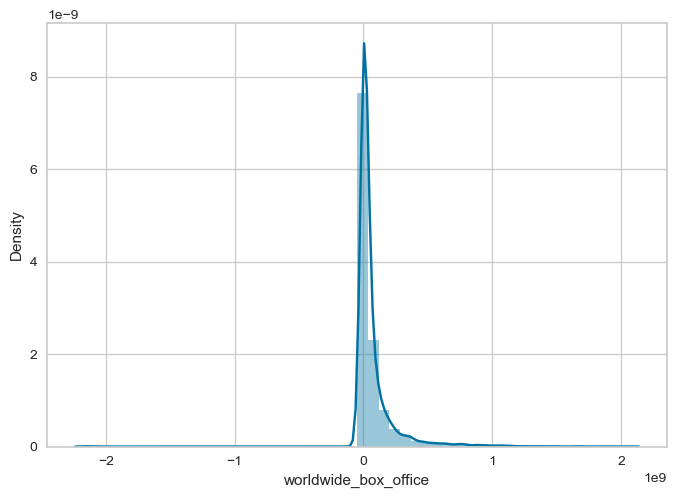

In [310]:
sns.distplot(df_cleaned["worldwide_box_office"])

d:\masterprograms\Anaconda\envs\MISY350\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log


(array([2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 5.124e+03,
        1.830e+02, 5.200e+01, 9.000e+00, 4.000e+00]),
 array([-2.14748365e+09, -1.72789931e+09, -1.30831497e+09, -8.88730627e+08,
        -4.69146287e+08, -4.95619470e+07,  3.70022393e+08,  7.89606733e+08,
         1.20919107e+09,  1.62877541e+09,  2.04835975e+09]),
 <BarContainer object of 10 artists>)

(array([   6.,   15.,   55.,  140.,  462.,  767.,  967., 1282., 1349.,
         329.]),
 array([ 2.48490665,  4.3804465 ,  6.27598636,  8.17152621, 10.06706607,
        11.96260592, 13.85814577, 15.75368563, 17.64922548, 19.54476534,
        21.44030519]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'Original Data')

Text(0.5, 1.0, 'Transformed Data')

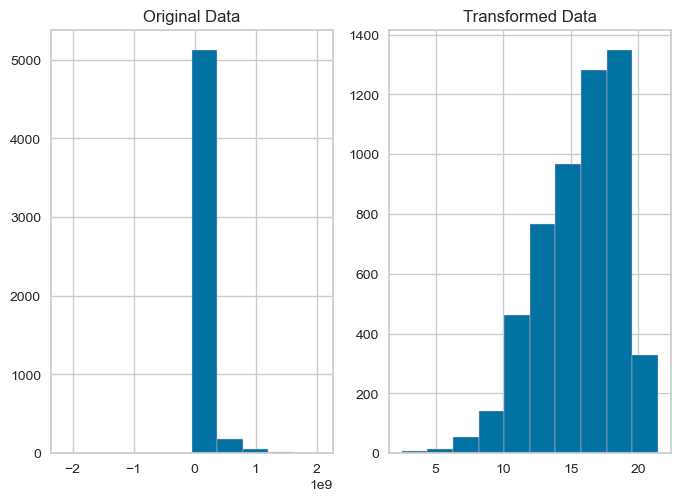

In [311]:
# Code adjusted from Business statistics project (Melanie) (2022). 
# create log-transformed data to check normality. 
data_log = np.log(df_cleaned["worldwide_box_office"]) 
data = df_cleaned["worldwide_box_office"]
# define grid of plots
fig, axs = plt.subplots(nrows=1, ncols=2)

#create histograms
axs[0].hist(data, edgecolor='pink')
axs[1].hist(data_log, edgecolor='pink')

#add title to each histogram
axs[0].set_title('Original Data')
axs[1].set_title('Transformed Data')

d:\masterprograms\Anaconda\envs\MISY350\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


<AxesSubplot:xlabel='worldwide_box_office', ylabel='Density'>

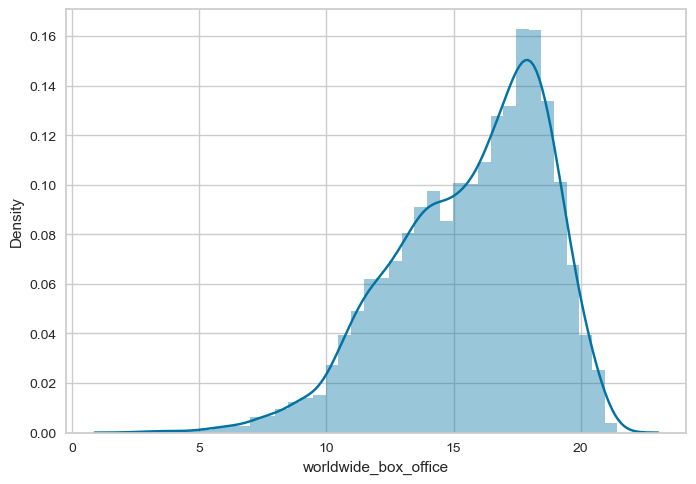

In [312]:
# Show distplot of worldwide box office after applying the log function. 
sns.distplot(data_log)

In [313]:
# impute missing values. Code adjusted from Scikit-learn (2007). 
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent',
                        missing_values=np.nan)
imputer = imputer.fit(df_cleaned)
df_cleaned.iloc[:,:] = imputer.transform(df_cleaned)
print()

C:\Users\Ward\AppData\Local\Temp\ipykernel_58892\4228925242.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [314]:
# Check if there are no missing values anymore. 
df_cleaned.isnull().sum()

studio                  0
rating                  0
runtime_x               0
genre_x                 0
metascore               0
userscore               0
RelDate                 0
Year                    0
genre_y                 0
worldwide_box_office    0
opening_weekend         0
theatre_count           0
runtime_y               0
dtype: int64

### III. EDA: Data Testing --- IN global EDA & Clustering Python file

### III. Feature Engineering

##### III.I Categorical variable encoding

In [315]:
#Convert Release date to release month --> Add source
from pandas import DatetimeIndex

month_labels = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August',9: 'September', 10: 'October', 11: 'November', 12: 'December'}

df_cleaned['RelDate'] = pd.DatetimeIndex(df_cleaned['RelDate']).month

x = df_cleaned['RelDate'].apply(lambda x: month_labels[x])

df_cleaned['ReleaseDate'] = x



d:\masterprograms\Anaconda\envs\MISY350\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '18-10-2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
d:\masterprograms\Anaconda\envs\MISY350\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '28-10-2011' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
d:\masterprograms\Anaconda\envs\MISY350\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '25-12-2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
d:\masterprograms\Anaconda\envs\MISY350\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '26-10-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
d:\masterprograms\Anaconda\envs\MISY350\lib\site-packages\pandas\core\indexes\dateti

In [316]:
# Drop column ReleaseDate --> Add source 
df_cleaned=df_cleaned.drop(columns=['ReleaseDate'])

# Rename RelDate to 'Release_Month'. 
df_cleaned.rename(columns = {'RelDate':'Release_Month'}, inplace = True)

In [317]:
# Numerical values for columns: Studio & Rating. The code is adjusted from.... 

#Defining the objects in our dataframe
dummy_obj_df = df_cleaned.select_dtypes(include=['object']).copy()
dummy_obj_df.head()

#Encoding the Categorical values of studio & rating into numerical values for the model analysis
from sklearn.preprocessing import OrdinalEncoder

#Using the OrdinalEncoder on a dummy_obj_df to make sure the encoding goes right
numerical_enc = OrdinalEncoder()
dummy_obj_df["studio_code"] = numerical_enc.fit_transform(dummy_obj_df[["studio"]])
dummy_obj_df["rating_code"] = numerical_enc.fit_transform(dummy_obj_df[["rating"]])

#using the OrdinalEncoder on the df_cleaned dataframe which is going to be used for model fitting
df_cleaned["studio_code"] = numerical_enc.fit_transform(df_cleaned[["studio"]])
df_cleaned["rating_code"] = numerical_enc.fit_transform(df_cleaned[["rating"]])
df_cleaned[["studio", "studio_code", "rating", 'rating_code']].head(10)


# Drop columns studio and rating 
df_cleaned = df_cleaned.drop(columns=['studio', 'rating'])

,studio,rating,genre_x,userscore,genre_y
3,Anchor Bay Entertainment,| R,"Drama,Comedy,Romance",6.9,Drama
5,Samuel Goldwyn Films,| R,Drama,6.1,Drama
9,Kino Lorber,| Not Rated,Drama,7.1,Drama
12,THINKFilm,| R,"Drama,Mystery,Thriller,Crime",6.7,Drama
16,Sony Pictures Classics,| PG-13,"Drama,Thriller,Crime,War",7.4,Thriller/Suspense


,studio,studio_code,rating,rating_code
3,Anchor Bay Entertainment,34.0,| R,10.0
5,Samuel Goldwyn Films,420.0,| R,10.0
9,Kino Lorber,260.0,| Not Rated,5.0
12,THINKFilm,461.0,| R,10.0
16,Sony Pictures Classics,439.0,| PG-13,9.0
19,Sony Pictures Classics,439.0,| PG-13,9.0
21,Fox Atomic,201.0,| PG-13,9.0
22,Warner Bros.,512.0,| R,10.0
23,Fox Searchlight Pictures,203.0,| R,10.0
25,Fox Searchlight Pictures,203.0,| R,10.0


In [318]:
df_cleaned.tail()

,runtime_x,genre_x,metascore,userscore,Release_Month,Year,genre_y,worldwide_box_office,opening_weekend,theatre_count,runtime_y,studio_code,rating_code
11989,89.0,Comedy,61,7.2,9,2001.0,Comedy,60780981,15525043.0,2507.0,89.0,373.0,10.0
11990,102.0,Comedy,34,4.1,12,2016.0,Comedy,55348693,13841146.0,3394.0,102.0,373.0,9.0
11992,83.0,"Action,Adventure,Sci-Fi,Family",26,4.4,11,2006.0,Adventure,12506188,4510408.0,2501.0,90.0,115.0,7.0
11994,96.0,"Drama,Comedy,Animation",55,5.7,2,2006.0,Adventure,12506188,4510408.0,2501.0,90.0,423.0,5.0
11995,108.0,"Action,Adventure,Comedy,Crime,Animation,Family",78,8.6,4,2016.0,Adventure,1004629935,75063401.0,3827.0,108.0,511.0,7.0


In [319]:
df_cleaned.head()

,runtime_x,genre_x,metascore,userscore,Release_Month,Year,genre_y,worldwide_box_office,opening_weekend,theatre_count,runtime_y,studio_code,rating_code
3,100.0,"Drama,Comedy,Romance",61,6.9,9,2012.0,Drama,987640,22707.0,3.0,100.0,34.0,10.0
5,93.0,Drama,44,6.1,1,2016.0,Drama,307,9134.0,4.0,93.0,420.0,10.0
9,93.0,Drama,65,7.1,8,2015.0,Drama,47019,9134.0,4.0,88.0,260.0,5.0
12,107.0,"Drama,Mystery,Thriller,Crime",36,6.7,8,2006.0,Drama,143782,20774.0,6.0,90.0,461.0,10.0
16,159.0,"Drama,Thriller,Crime,War",72,7.4,4,2009.0,Thriller/Suspense,4581361,12042.0,5.0,159.0,439.0,9.0


In [320]:
# Code adjusted from Pinosio (2022)
# Defines main and other genres, goes over the genre_x column and counts the set genres

main_genres = ['Comedy', 'Drama', 'Action','Romance','Adventure','Horror','Thriller'] # Define main genres here

is_main_genre = {}

genres = df_cleaned['genre_x'].str.split(',') #Splits the genres with a comma 

len_genres = []
n_other_genres = []
#is_comedy = []
#is_drama = []

for genre_list in genres:
    try:
      l = len(genre_list)
      len_genres.append(l)
      other_genres = [x for x in genre_list if x not in main_genres] #Defines other genres (those that are not in "main_genre")
      n_other_genres.append(len(other_genres)) 

      for main_genre in main_genres:
        if main_genre in genre_list:
          is_main_genre.setdefault(main_genre, []).append(1) 
        else:
          is_main_genre.setdefault(main_genre, []).append(0)
    except:
        len_genres.append(0)
        n_other_genres.append(0)
        for main_genres in main_genres:
          is_main_genre.setdefault(main_genre, []).append(0)

In [321]:
# Looks if the genre column containts the genre then creates a boolean array

is_comedy= 'Comedy'in genre_list
is_drama= 'Drama'in genre_list
is_horror= 'Horror' in genre_list
is_romance='Romance' in genre_list
is_action='Action' in genre_list
is_adventure='Adventure' in genre_list
is_thriller='Thriller' in genre_list

# Adds the array to the dataframe but I think it just creates a temporary copy here

df_cleaned['is_comedy'] = is_comedy
df_cleaned['is_drama'] = is_drama
df_cleaned['is_horror'] = is_horror
df_cleaned['is_romance'] = is_romance
df_cleaned['is_action'] = is_action
df_cleaned['is_adventure'] = is_adventure
df_cleaned['is_thriller'] = is_thriller

df_genres = df_cleaned[['genre_x','is_comedy','is_drama','is_horror','is_romance','is_action','is_adventure','is_thriller']]
df_cleaned['is_comedy'].dropna(inplace=True)

NAs = df_cleaned[df_cleaned.isna().any(axis=1)]

# Specify whether a certain movie has "other genres" in the genre column

has_other_genres = []

for genrenum in n_other_genres:
    if genrenum >= 1:
        has_other_genres.append(True)
    else:
        has_other_genres.append(False)

df_cleaned['has_other_genre'] = has_other_genres

df_genres['has_other_genre'] = has_other_genres

# convert from true/false to 1/0 by changing the types
df_cleaned['is_comedy'] = df_cleaned['is_comedy'].astype('int64') 
df_cleaned['is_drama'] = df_cleaned['is_drama'].astype('int64') 
df_cleaned['is_horror'] = df_cleaned['is_horror'].astype('int64') 
df_cleaned['is_romance'] = df_cleaned['is_romance'].astype('int64')
df_cleaned['is_action'] = df_cleaned['is_action'].astype('int64')
df_cleaned['is_adventure'] = df_cleaned['is_adventure'].astype('int64')
df_cleaned['is_thriller'] = df_cleaned['is_thriller'].astype('int64')
df_cleaned['has_other_genre'] = df_cleaned['has_other_genre'].astype('int64')


C:\Users\Ward\AppData\Local\Temp\ipykernel_58892\380175729.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [322]:
# Drop columns genre_ x andf genre_y
df_cleaned= df_cleaned.drop(columns=['genre_y', 'genre_x'])

In [323]:
df_cleaned.head()

,runtime_x,metascore,userscore,Release_Month,Year,worldwide_box_office,opening_weekend,theatre_count,runtime_y,studio_code,rating_code,is_comedy,is_drama,is_horror,is_romance,is_action,is_adventure,is_thriller,has_other_genre
3,100.0,61,6.9,9,2012.0,987640,22707.0,3.0,100.0,34.0,10.0,1,0,0,0,1,1,0,0
5,93.0,44,6.1,1,2016.0,307,9134.0,4.0,93.0,420.0,10.0,1,0,0,0,1,1,0,0
9,93.0,65,7.1,8,2015.0,47019,9134.0,4.0,88.0,260.0,5.0,1,0,0,0,1,1,0,0
12,107.0,36,6.7,8,2006.0,143782,20774.0,6.0,90.0,461.0,10.0,1,0,0,0,1,1,0,1
16,159.0,72,7.4,4,2009.0,4581361,12042.0,5.0,159.0,439.0,9.0,1,0,0,0,1,1,0,1


In [324]:
df_cleaned.dtypes

runtime_x               float64
metascore                 int64
userscore                object
Release_Month             int64
Year                    float64
worldwide_box_office      int64
opening_weekend         float64
theatre_count           float64
runtime_y               float64
studio_code             float64
rating_code             float64
is_comedy                 int64
is_drama                  int64
is_horror                 int64
is_romance                int64
is_action                 int64
is_adventure              int64
is_thriller               int64
has_other_genre           int64
dtype: object

#### II.I Describe findings 

### VIII. Peceptron model and Artifical Neutral - Ward

In [325]:
#Code done by Ward
import seaborn as sb

In [326]:
#Creating Neural dataframe for transforming and fitting model
#Worldwide_box_office is logged here
df_cleaned['wbo_log'] = data_log
#Making a neural Network dataframe for custom feature tuning
df_neural = df_cleaned


In [327]:
#Renaming Release_month and month to year and month
df_neural = df_neural.rename(columns={'Release_Month': 'Month'})
df_neural['date'] = pd.to_datetime(df_neural[['Year', 'Month']].assign(DAY=1))
#Setting a min and max date for our date feature
df_neural['date'] = pd.to_datetime(df_neural['date'],format = '%d.%m.%Y')
print('min date from neural set: %s' % df_neural ['date'].min().date())
print('min date from neural set: %s' % df_neural ['date'].max().date())

min date from neural set: 2000-01-01
min date from neural set: 2021-12-01


In [328]:
#imputing missing values in our data set. 
imputer = SimpleImputer(strategy='most_frequent',
                        missing_values=np.nan)
imputer = imputer.fit(df_neural)
df_neural.iloc[:,:] = imputer.transform(df_neural)
print()

In [329]:
#Determining corrleation for worldwide_box_office
df_neural.corr().worldwide_box_office.sort_values()

Year                   -0.048185
rating_code             0.015672
Month                   0.016723
metascore               0.019221
has_other_genre         0.167699
studio_code             0.167955
runtime_x               0.221032
runtime_y               0.248395
wbo_log                 0.541985
theatre_count           0.574865
opening_weekend         0.809562
worldwide_box_office    1.000000
is_comedy                    NaN
is_drama                     NaN
is_horror                    NaN
is_romance                   NaN
is_action                    NaN
is_adventure                 NaN
is_thriller                  NaN
Name: worldwide_box_office, dtype: float64

<Figure size 1000x600 with 0 Axes>

<AxesSubplot:xlabel='opening_weekend', ylabel='worldwide_box_office'>

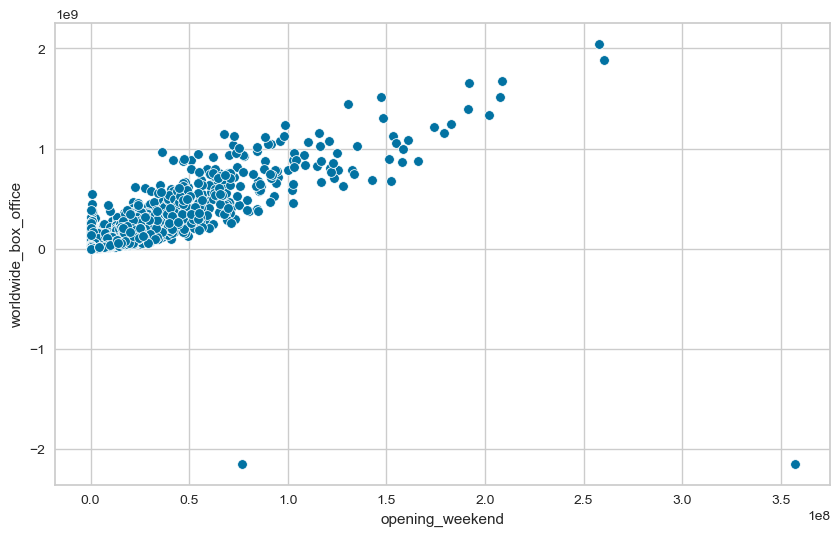

In [330]:
# Exploring a highly correlated features with a scatterplot
plt.figure(figsize=(10,6))
sns.scatterplot(x='opening_weekend', y='worldwide_box_office', data=df_neural)

date
2000-01-01    1.826086e+07
2000-02-01    4.401569e+08
2000-03-01    9.371054e+08
2000-04-01    1.127411e+09
2000-05-01    1.056962e+09
                  ...     
2021-08-01    1.221443e+09
2021-09-01    4.316344e+08
2021-10-01    4.657908e+08
2021-11-01    8.936226e+08
2021-12-01    2.524594e+09
Name: worldwide_box_office, Length: 264, dtype: float64

<Figure size 1500x800 with 0 Axes>

Text(0.5, 1.0, 'Total Sales')

Text(0.5, 0, 'Month')

Text(0, 0.5, 'Sales')

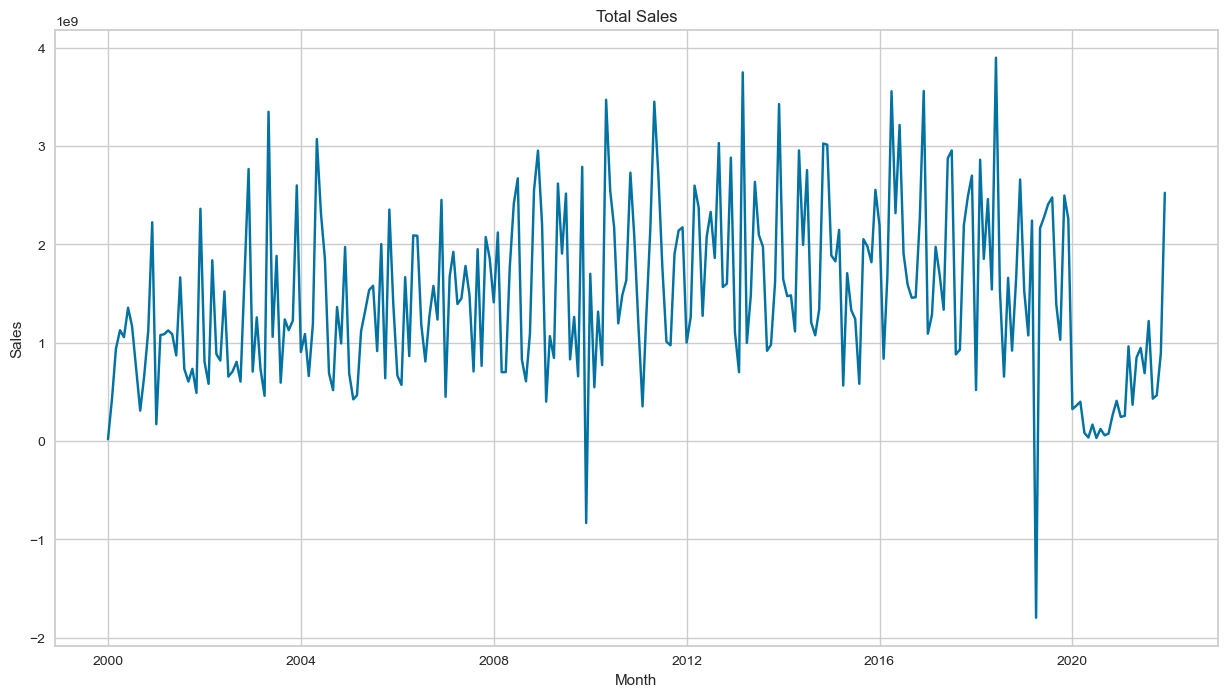

In [331]:
#Basic Plots for worldwide_box_office
wbo=df_neural.groupby(["date"])["worldwide_box_office"].sum()
wbo.astype('float')
plt.figure(figsize=(15,8))
plt.title('Total Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.plot(wbo)

<AxesSubplot:xlabel='worldwide_box_office'>

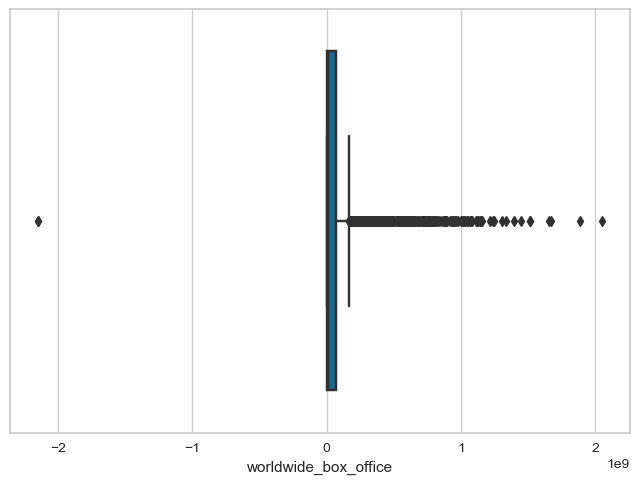

In [332]:
#looking for outliers in the worldwide_box_office data
sb.boxplot(x=df_neural['worldwide_box_office'])

<AxesSubplot:xlabel='worldwide_box_office'>

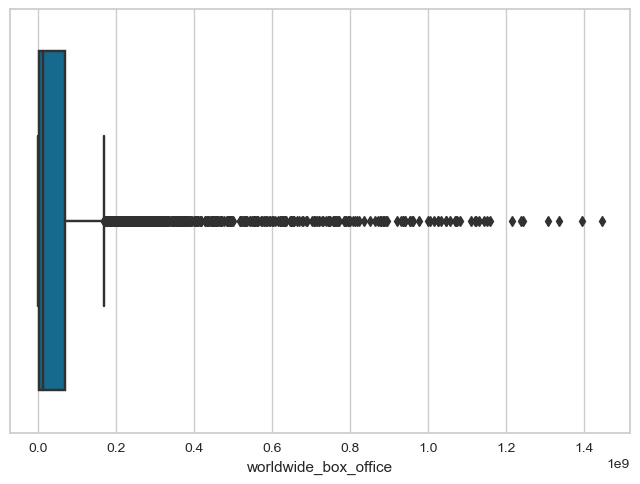

In [333]:
#Removing the biggest outliers from the data set
df_neural = df_neural[(df_neural.worldwide_box_office < 1500000000) & (df_neural.worldwide_box_office > 0)]

#As we can see the biggest outliers of worldwide box office are gone
sb.boxplot(x=df_neural['worldwide_box_office'])

<AxesSubplot:xlabel='Month'>

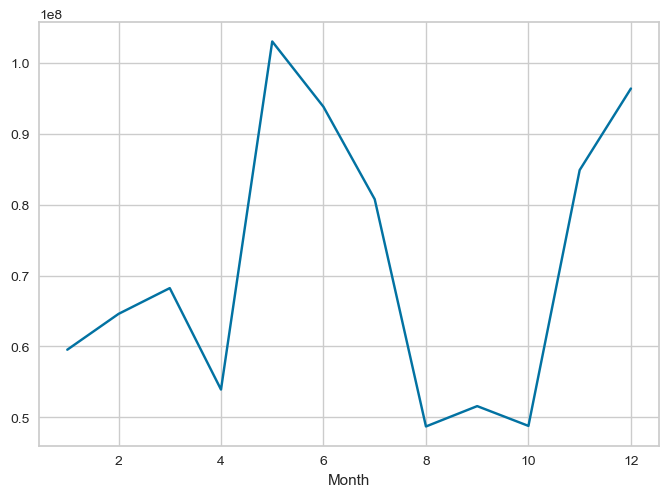

In [334]:
# Mean Price varying throughout the months
df_neural.groupby('Month').mean()['worldwide_box_office'].plot()

In [335]:
#A quick look at the feature columns before determining the features that will be used in the Neural Network
df_neural.head()

,runtime_x,metascore,userscore,Month,Year,worldwide_box_office,opening_weekend,theatre_count,runtime_y,studio_code,...,is_comedy,is_drama,is_horror,is_romance,is_action,is_adventure,is_thriller,has_other_genre,wbo_log,date
3,100.0,61,6.9,9,2012.0,987640,22707.0,3.0,100.0,34.0,...,1,0,0,0,1,1,0,0,13.803074,2012-09-01
5,93.0,44,6.1,1,2016.0,307,9134.0,4.0,93.0,420.0,...,1,0,0,0,1,1,0,0,5.726848,2016-01-01
9,93.0,65,7.1,8,2015.0,47019,9134.0,4.0,88.0,260.0,...,1,0,0,0,1,1,0,0,10.758307,2015-08-01
12,107.0,36,6.7,8,2006.0,143782,20774.0,6.0,90.0,461.0,...,1,0,0,0,1,1,0,1,11.876054,2006-08-01
16,159.0,72,7.4,4,2009.0,4581361,12042.0,5.0,159.0,439.0,...,1,0,0,0,1,1,0,1,15.337507,2009-04-01


In [336]:
#We are gonna trim down our features to not overfit our model, Runtime, Theatre_count, studio_code and genres have a high correlation with boxx office and will therefore be used in our Neural network model
#This has been changed multiple times to prevent overfitting or underfitting
df_neural = df_neural.drop(columns=['Month', 'Year', 'opening_weekend', 'is_comedy','is_drama',	'is_horror', 'is_romance',	
'is_action', 'is_adventure','is_thriller', 'worldwide_box_office', 'runtime_y', 'date'])
df_neural

,runtime_x,metascore,userscore,theatre_count,studio_code,rating_code,has_other_genre,wbo_log
3,100.0,61,6.9,3.0,34.0,10.0,0,13.803074
5,93.0,44,6.1,4.0,420.0,10.0,0,5.726848
9,93.0,65,7.1,4.0,260.0,5.0,0,10.758307
12,107.0,36,6.7,6.0,461.0,10.0,1,11.876054
16,159.0,72,7.4,5.0,439.0,9.0,1,15.337507
...,...,...,...,...,...,...,...,...
11989,89.0,61,7.2,2507.0,373.0,10.0,0,17.922787
11990,102.0,34,4.1,3394.0,373.0,9.0,0,17.829164
11992,83.0,26,4.4,2501.0,115.0,7.0,1,16.341734
11994,96.0,55,5.7,2501.0,423.0,5.0,1,16.341734


Hot encoder transformer was used but was not needed for eventual data set/model

In [337]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# 1. fit a one hot encoder transformer to the TRAIN SET. The object we obtain will be reused later, to transform our data
# note: it is important that these transformers are fitted only on the train data.
#one_hot_encoder = OneHotEncoder() # one hot encoder is a class instance
#_ = one_hot_encoder.fit(df_neural[['Month',]]) # we can fit the encoder instance on the columns that need to be transformed.
#df_neural


In [338]:
# let's check what the encoder did
#one_hot_encoder.categories_ # after we fit the encoder, the instance learns which values are present in each data column.
#encoded_names = one_hot_encoder.get_feature_names_out() # with this method we can retrieve the names of the new dummy columns that have been computed
#encoded_names
#encoded_categories = one_hot_encoder.transform(df_neural[['Month']]).toarray() # at this point, we can use the fitted encoder to transform any array with a sex and marriage column; not just the training set, but also the validation or test set. The encoder will take that array of shape (M,2) and transform it to an array of shape (M, N), where N is the total number of distinct possible values for the encoded features. The values of the new array will be either 0 or 1, encoding whether that value of the feature applies to the row.
#df_encoded = pd.DataFrame(encoded_categories)
#df_encoded.columns = encoded_names
#df_encoded

In [339]:
# after we have generated the dummy columns, we want to drop the original columns from the training data, and replace them with the dummy columns
#df_neural = df_neural.drop(['Month',], axis=1)
#df_neural = pd.concat([df_neural, df_encoded], axis=1)
#df_neural

In [340]:
# Library's for the Neural Network model
#pip install tensorflow
#pip install fast_ml
#pip install plotnine
from plotnine import *
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
print('tensorflow: %s' % tensorflow.__version__)
import keras
print('keras: %s' % keras.__version__)

# Importing important features of the keras library
from keras.models import Sequential
from keras.layers import Dense

tensorflow: 2.11.0
keras: 2.11.0


In [341]:
#Removing Na's from the wbo_log again to make sure the model will work
df_neural =df_neural[df_neural['wbo_log'].notna()]
df_neural
df_neural.isna().sum()

,runtime_x,metascore,userscore,theatre_count,studio_code,rating_code,has_other_genre,wbo_log
3,100.0,61,6.9,3.0,34.0,10.0,0,13.803074
5,93.0,44,6.1,4.0,420.0,10.0,0,5.726848
9,93.0,65,7.1,4.0,260.0,5.0,0,10.758307
12,107.0,36,6.7,6.0,461.0,10.0,1,11.876054
16,159.0,72,7.4,5.0,439.0,9.0,1,15.337507
...,...,...,...,...,...,...,...,...
11989,89.0,61,7.2,2507.0,373.0,10.0,0,17.922787
11990,102.0,34,4.1,3394.0,373.0,9.0,0,17.829164
11992,83.0,26,4.4,2501.0,115.0,7.0,1,16.341734
11994,96.0,55,5.7,2501.0,423.0,5.0,1,16.341734


runtime_x          0
metascore          0
userscore          0
theatre_count      0
studio_code        0
rating_code        0
has_other_genre    0
wbo_log            0
dtype: int64

In [342]:
#Defining X and y
X = df_neural.drop('wbo_log',axis=1).values
y = df_neural['wbo_log'].values

In [343]:
from sklearn.model_selection import train_test_split

In [344]:
#Splitting data set into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=101)

#Iporting MinMaxScaler for scaling
from sklearn.preprocessing import MinMaxScaler



In [345]:
#Scaling Train and test data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train.shape

(4292, 7)

In [346]:
#Looking for how many Neurons we need for our model 
# This code was adapted from Riccardo's Neural Network example
from tensorflow import keras
from tensorflow.keras import layers
print(f"The amount of Neurons for the train dataset must be: {X_train.shape[1]}")

The amount of Neurons for the train dataset must be: 7


In [347]:
#Choosing for Sequential model
model_nn = Sequential()
#Adding Dense 7 layers based on number of Neurons
model_nn.add(Dense(7,activation='relu'))
model_nn.add(Dense(4,activation='relu'))
#Output
model_nn.add(Dense(1))
#Optimizer is adam with a loss of mse
model_nn.compile(optimizer='adam',loss='mse')

In [348]:
#Fitting our model with the X_train and y_train
#Validation is added to see performance against unkown data
model_nn.fit(x=X_train, y=y_train, validation_split=0.2, batch_size=50, epochs=75)


Epoch 1/75
69/69 [==============================] - 1s 2ms/step - loss: 253.4003 - val_loss: 251.6110
Epoch 2/75
69/69 [==============================] - 0s 1ms/step - loss: 244.7478 - val_loss: 239.5236
Epoch 3/75
69/69 [==============================] - 0s 1ms/step - loss: 225.2058 - val_loss: 211.1768
Epoch 4/75
69/69 [==============================] - 0s 1ms/step - loss: 187.4038 - val_loss: 163.6760
Epoch 5/75
69/69 [==============================] - 0s 1ms/step - loss: 134.2609 - val_loss: 105.8300
Epoch 6/75
69/69 [==============================] - 0s 1ms/step - loss: 78.0083 - val_loss: 52.9588
Epoch 7/75
69/69 [==============================] - 0s 1ms/step - loss: 34.9353 - val_loss: 20.8329
Epoch 8/75
69/69 [==============================] - 0s 1ms/step - loss: 15.4976 - val_loss: 11.3158
Epoch 9/75
69/69 [==============================] - 0s 1ms/step - loss: 11.1926 - val_loss: 9.7444
Epoch 10/75
69/69 [==============================] - 0s 1ms/step - loss: 10.4355 - val_loss

First model after a few tweaks shows Loss and val_loss decreasing steadily 

<AxesSubplot:>

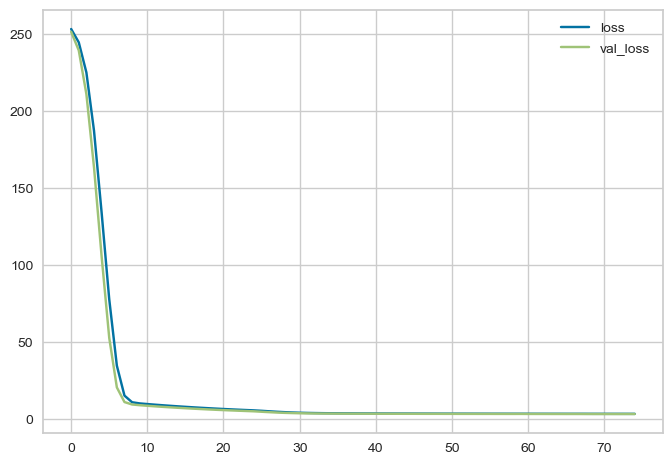

In [349]:
losses_nn = pd.DataFrame(model_nn.history.history)
losses_nn.plot()
# We want in decrease in both and no increase in the validation set
# If val_loss begin to spike, it means overfitting, because we will have a much larger loss on validation data

In [350]:
# MSE, MAE
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

#Making Prediction label for calculating mse and mae to grade the model and adjust it
predictions = model_nn.predict(X_test)

34/34 [==============================] - 0s 637us/step


In [351]:
# Calculating MSE for model_nn
mean_squared_error(y_test,predictions)


3.9054323148650947

In [352]:
#RMSE
np.sqrt(mean_squared_error(y_test,predictions))



1.9762166669839354

In [353]:
#Mean absolute error
mean_absolute_error(y_test,predictions)
#We are off by 1.43



1.4514301626463935

In [354]:
#Describing to determine percentage we are off the mean
df_neural['wbo_log'].describe()

#We are around 8.79-9% off the mean. So a variance of 8.79-9%

count    5366.000000
mean       15.690947
std         2.977275
min         2.484907
25%        13.662775
50%        16.239354
75%        18.038155
max        21.091501
Name: wbo_log, dtype: float64

In [355]:
explained_variance_score(y_test, predictions)
# This tells us how much variance is being explained by our model
# Best score is 1, lower values are worse



0.5679643408055581

In [356]:
final_nn_model = Sequential()

final_nn_model.add(Dense(7,activation='relu'))
final_nn_model.add(Dense(4,activation='relu'))
final_nn_model.add(Dense(1))

final_nn_model.compile(optimizer='adam',loss='mse')

In [357]:
final_nn_model.fit(x=X_train, y=y_train,validation_split=0.2, batch_size=20, epochs=150)

Epoch 1/150
172/172 [==============================] - 1s 1ms/step - loss: 253.7924 - val_loss: 251.5081
Epoch 2/150
172/172 [==============================] - 0s 989us/step - loss: 246.7567 - val_loss: 246.1984
Epoch 3/150
172/172 [==============================] - 0s 966us/step - loss: 241.5371 - val_loss: 241.0062
Epoch 4/150
172/172 [==============================] - 0s 989us/step - loss: 236.4041 - val_loss: 235.8833
Epoch 5/150
172/172 [==============================] - 0s 977us/step - loss: 231.3504 - val_loss: 230.8425
Epoch 6/150
172/172 [==============================] - 0s 972us/step - loss: 226.3733 - val_loss: 225.8837
Epoch 7/150
172/172 [==============================] - 0s 989us/step - loss: 221.4730 - val_loss: 220.9934
Epoch 8/150
172/172 [==============================] - 0s 972us/step - loss: 216.6490 - val_loss: 216.1737
Epoch 9/150
172/172 [==============================] - 0s 995us/step - loss: 211.8970 - val_loss: 211.4377
Epoch 10/150
172/172 [=================

<Figure size 1200x600 with 0 Axes>

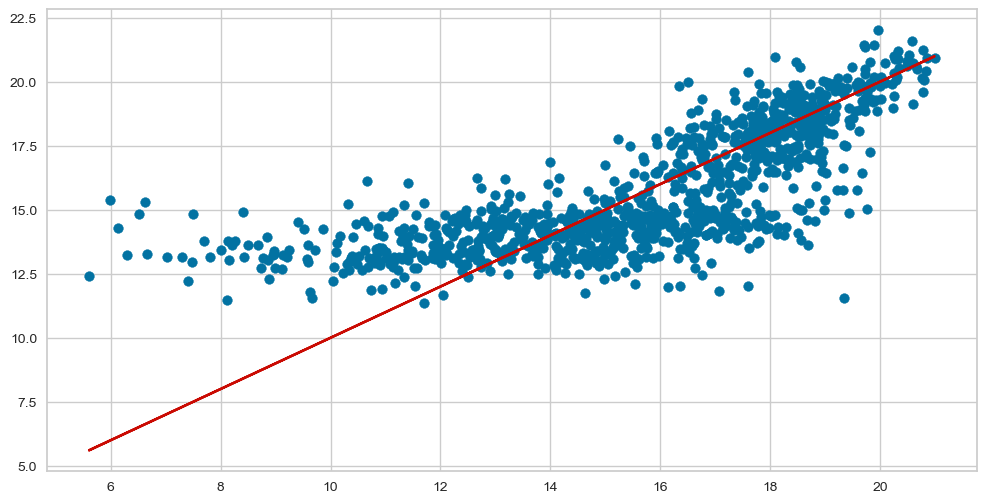

In [358]:
#Plotting to see how close the model comes to predicing the true values
plt.figure(figsize=(12,6))
plt.scatter(y_test, predictions)
plt.plot(y_test,y_test, 'r')

#Model gets better the more data it sees

In [359]:
#Making Prediction label for calculating mse and mae to grade the model and adjust it
final_predictions = final_nn_model.predict(X_test)

34/34 [==============================] - 0s 728us/step


In [360]:
#Mean absolute error
mean_absolute_error(y_test,final_predictions)
#We are off by 1.41

#Describing to determine percentage we are off the mean
df_neural['wbo_log'].describe()

#We are around 8-9% off the mean. So a variance of 8-9%

2.474685916732308

count    5366.000000
mean       15.690947
std         2.977275
min         2.484907
25%        13.662775
50%        16.239354
75%        18.038155
max        21.091501
Name: wbo_log, dtype: float64

In [361]:
explained_variance_score(y_test, final_predictions)
# This tells us how much variance is being explained by our model
# Best score is 1, lower values are worse
#We can see a slight increase from the model_nn to the final model

0.0

In [362]:
#Importing library's for hyperparameter tuning
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_regression
from sklearn.metrics import get_scorer_names

In [363]:
#I have build 2 working hyper parameter tuning codes
# This one is adapted from Stackoverflow
#Defining model which will be used for the GridSearchCV model
#def make_regression_ann(neurons=1, activation='relu', optimizer='adam', loss='mse'):

    #model = Sequential()
    #model.add(Dense(units=7, input_dim=7, activation=activation))
    #model.add(Dense(units=4, activation=activation))
    #model.add(Dense(1))
    #model.compile(loss=loss, optimizer=optimizer)

    #return model
#Parameters for the GridSearch
#param_grid = {
    #'batch_size': [10, 20, 30],
    #'epochs': [5, 10, 20],
    #'neurons': [5, 7, 10]
#}

#grid_search = GridSearchCV(
    #estimator=KerasRegressor(make_regression_ann, neurons=1),
    #param_grid=param_grid,
    #scoring='neg_mean_squared_error',
    #cv=3,
#)
#grid_search = grid_search.fit(X_train, y_train, validation_split=0.2)

#grid_search.fit(X, y, verbose=1)


#grid_search.best_params_


In [364]:
#Code adjusted from Riccardo - Credit_risk_case_study/modelling
# Defining the model for a GridSearchCV
# Neurons get a =1 to let the grid search see it as a parameter
def create_model(neurons=1):
    nn_model = Sequential()
    nn_model.add(Dense(neurons, input_dim=X_train.shape[1], activation="relu"))
    nn_model.add(Dense(1, activation='sigmoid'))
    nn_model.compile(loss='mse', optimizer='adam')
    return nn_model
#Random Seed 
seed = 1234
np.random.seed(seed)

# Making the model work with sklearn
# Specifing neurons as 1 to sklearn
model = KerasRegressor(build_fn=create_model, verbose=0, neurons=1)

C:\Users\Ward\AppData\Local\Temp\ipykernel_58892\400958560.py:16: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


In [365]:
#Code adjusted from Riccardo - Credit_risk_case_study/modelling
# define the grid search parameters for our GridSearchCV
batch_size = [3, 10, 20]
epochs = [35,, 60 150]
neurons = [5, 6, 7]
params_grid = dict(batch_size=batch_size, epochs=epochs, neurons=neurons)


In [366]:
#Code adjusted from Riccardo - Credit_risk_case_study/modelling
#Performing the GridSearchCV on the model created above
grid_search_nn = GridSearchCV(estimator=model, param_grid=params_grid, n_jobs=-1, cv=2)
grid_search_nn = grid_search_nn.fit(X_train, y_train, validation_split=0.2 )

In [367]:
#Code adjusted from Riccardo - Credit_risk_case_study/modelling
print("The best parameter combination is: {}".format(grid_search_nn.best_params_))

#GridSearchCV was performed numerous times to predict the best hyperparameters

The best parameter combination is: {'batch_size': 3, 'epochs': 35, 'neurons': 5}


In [368]:
best_nn_model = Sequential()

best_nn_model.add(Dense(5,activation='relu'))
best_nn_model.add(Dense(5,activation='relu'))
best_nn_model.add(Dense(1))

best_nn_model.compile(optimizer='adam',loss='mse')

In [369]:
best_nn_model.fit(x=X_train, y=y_train, validation_split=0.2, batch_size=3, epochs=35)

Epoch 1/35
1145/1145 [==============================] - 2s 1ms/step - loss: 64.9984 - val_loss: 5.3217
Epoch 2/35
1145/1145 [==============================] - 1s 1ms/step - loss: 4.5896 - val_loss: 3.7527
Epoch 3/35
1145/1145 [==============================] - 1s 988us/step - loss: 3.8740 - val_loss: 3.6664
Epoch 4/35
1145/1145 [==============================] - 1s 1ms/step - loss: 3.7774 - val_loss: 3.6106
Epoch 5/35
1145/1145 [==============================] - 1s 1ms/step - loss: 3.7347 - val_loss: 3.6038
Epoch 6/35
1145/1145 [==============================] - 1s 1ms/step - loss: 3.7127 - val_loss: 3.5702
Epoch 7/35
1145/1145 [==============================] - 1s 979us/step - loss: 3.6925 - val_loss: 3.5567
Epoch 8/35
1145/1145 [==============================] - 1s 1ms/step - loss: 3.6751 - val_loss: 3.8018
Epoch 9/35
1145/1145 [==============================] - 1s 949us/step - loss: 3.6707 - val_loss: 3.5267
Epoch 10/35
1145/1145 [==============================] - 1s 1ms/step - loss

In [370]:
#Making Prediction label for calculating mse and mae to grade the model and adjust it
best_predictions = best_nn_model.predict(X_test)

34/34 [==============================] - 0s 667us/step


In [371]:
# Calculating MSE for best_nn_model
mse_best = mean_squared_error(y_test,best_predictions)
#RMSE
rmse_best = np.sqrt(mean_squared_error(y_test,best_predictions))
#Mean absolute error
mae_best = mean_absolute_error(y_test,best_predictions)
#EVS
evs_best = explained_variance_score(y_test, best_predictions)


print("Results of model by calculation:")
print("MAE:", mae_best)
print("MSE:", mse_best)
print("RMSE:", rmse_best)
# EVS tells us how much variance is being explained by our model
# Best score is 1, lower values are worse
print("EVS:", evs_best)

Results of model by calculation:
MAE: 1.413101979255846
MSE: 3.7601512697141155
RMSE: 1.9391109482734905
EVS: 0.5836422876377472


In [372]:
#Describing to determine percentage we are off the mean
df_neural['wbo_log'].describe()

#We are around 8-9% off the mean. So a variance of 8-9%

count    5366.000000
mean       15.690947
std         2.977275
min         2.484907
25%        13.662775
50%        16.239354
75%        18.038155
max        21.091501
Name: wbo_log, dtype: float64

By Hyperparameter tuning we got determined the best hyperparameters for our model 'neurons', 'epochs', 'batch-size'.


MSE is a bit higher than prevous models. This is because the model works less well with live data/test data.



<Figure size 1200x600 with 0 Axes>

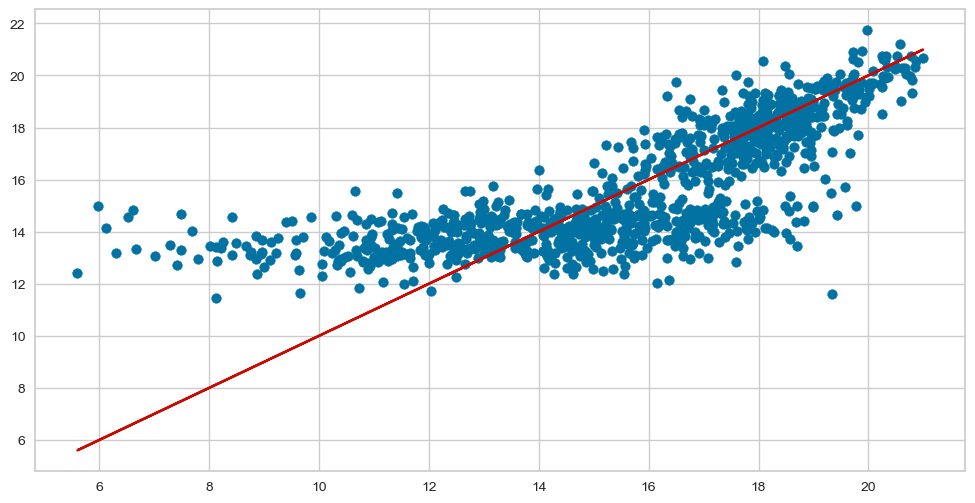

In [373]:
#Plotting to see how close the model comes to predicing the true values
plt.figure(figsize=(12,6))
plt.scatter(y_test, best_predictions)
plt.plot(y_test,y_test, 'r')

#Model gets better the more data it sees

#### VIII.I Describe findings

The Neural Network model has used some of the general EDA and expanded on that by feature engineering the dataframe into something that could be used for the Neural Network.

Categorical values have been transformed into encoded features in order to be used for our Neural Network model

The data was scaled. After the scaling, certain features were chosen based on correlation and usability for the fitting of the Neural Network.

Fitting was done by manual tuning. In the first model_nn a loss: loss: 3.6609 - val_loss: 3.5487 were concluded.

Readjustments were made on the model which created the best_nn_model
Fitting was done by hypertuning via a GridSearchCV. In the best_nn_model loss: 3.6036 - val_loss: 3.5345 were concluded. The slight increase in val_loss and loss are justifiable becasue the data was ran on the test data.

Results of best__nn_model by calculation:

MAE: 1.413101979255846

MSE: 3.7601512697141155

RMSE: 1.9391109482734905

EVS: 0.5836422876377472


The Neural Network has quite a decent mae but for further predictions could have a downfall with real live data.

Further research and testing should be done to create a better model which is robust, accurate and efficient.

In [374]:
#End of Code written by Ward

Reflection Ward Bleeker

Personal reflection: In this course I have made the biggest step in my coding learning curve. I have spend alot of hours just working out error querries. In order to get better at coding, I find the best way is to just start and make the hours. That is exactly what I did in this course, in combination with the interesting lectures and Youtube/Google I found alot of inforamtion on machine learning for the future and this project. I improved on my error finding skills (Fixing the errors) and also the way I structure my code. This has been the most hard but also most interesting course of year

Melanie: Melanie is the organizer of the group. Alot of the organizational and structure Melanie takes upon herself to fix. This makes it easy for her teammates to focus on their coding/task. Melanie worked on the clustering model and had good communication with Guido from an outside view. Melanie made sure all components of the assignment where ready and working. Melanie improved alot in her Technical coding knowledge this project and is making big steps in understanding the things she is coding.

Guido: Guido worked on the clustering model. From an outside view the comunication between Guido and Melanie was spot on and they meshed well together while building the model. Guido is a hard worker, the Coding is not his strongest point as he has explained to us. But even if its not his strongest point he still manages to deliver well documented code that is easy for teammates to read/adjust. Guido is a real teamplayer and doesnt mind to get his hands dirty on the work that needs to be done. With every project Guido is improving in his technical skills.

Viktor: Viktor worked on the Random Forest and kNN model. These models have a slight correlation with the work I did for the Neural Network. It was great to work with Viktor cause I could always ask for advice on a querry that was not working. Viktor has an affinity for coding and is getting better with each project that he completes. The reason VIktor is getting better with each project that he completes is that he can store/use the information in his head in a more organised way cause of the experience that he is building up.

### Bibliography 

DataSciencePartners. (2022, November 8). Data Cleaning in Python: 4 stappen met voorbeelden in Pandas. Data Science Partners | Experts in Python. Retrieved from https://pythoncursus.nl/data-cleaning-python/

Data to Fish. (2021, July). Replace Characters in Strings in Pandas DataFrame. Retrieved from https://datatofish.com/replace-character-pandas-dataframe/

Scikit-learn. (2007-2022). 6.4. Imputation of missing values. (2007). Retrieved from https://scikit-learn.org/stable/modules/impute.html

PB Python. (2017, February). Guide to Encoding Categorical Values in Python. Retrieved from: https://pbpython.com/categorical-encoding.html

Kaggle. (2019). House Sales Prediction -Artifical Neural Network. Retrieved from:  https://www.kaggle.com/code/limwenhau/house-sales-prediction-artificial-neural-network

TowardsDataScience. (2018, Sept). Deep Neural Networks for regression Problems: https://towardsdatascience.com/deep-neural-networks-for-regression-problems-81321897ca33

Tensorflow. (2022). Basic Regression: Predict fuel efficiency: (https://www.tensorflow.org/tutorials/keras/regression

Tensorflow. (2019). Get started with using TensorFlow to solve for regression problems (Coding TensorFlow): https://www.youtube.com/results?search_query=regression+neural+network

GitHub - Riccardo Pinosio. (2022). Predicting credit default: https://github.com/riccardopinosio/DDB_AI/blob/main/credit_risk_case_study/modelling.ipynb